In [5]:
import pandas as pd
from sklearn import linear_model

In [6]:
appledf = pd.read_csv('../data/processed/DataProcessed.csv')

In [7]:
appledf.head()

,revenue,costOfRevenue,grossProfit,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,ebitda,operatingIncome,netIncome
0,1.9183,1.0760,0.8423,0.0,0.6532,0,0.6950,0.0,0.6950,0.1891,0.1473,0.0612
1,1.9019,0.8400,1.0619,0.0,0.7373,0,0.7884,0.0,0.7884,0.3246,0.2735,0.1540
2,2.6611,1.2257,1.4354,0.0,0.9934,0,1.0639,0.0,1.0639,0.4420,0.3715,0.2175
3,4.0714,1.9132,2.1582,0.0,1.4602,0,1.5379,0.0,1.5379,0.6980,0.6203,0.4003
4,5.2840,2.5700,2.7140,0.0,1.9549,0,2.0797,0.0,2.0797,0.7591,0.6343,0.4540


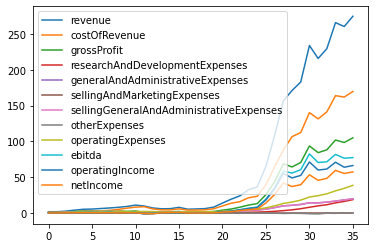

In [8]:
appledf.plot(kind='line');

<AxesSubplot:xlabel='revenue', ylabel='costOfRevenue'>

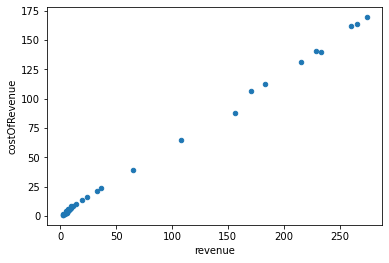

In [11]:
appledf.plot(kind = 'scatter', x='revenue', y='costOfRevenue')

In [12]:
appledf.corr()

,revenue,costOfRevenue,grossProfit,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,ebitda,operatingIncome,netIncome
revenue,1.000000,0.999496,0.998771,0.939552,0.993723,NaN,0.993040,-0.536602,0.979462,0.994519,0.991342,0.996547
costOfRevenue,0.999496,1.000000,0.996693,0.945411,0.994014,NaN,0.993240,-0.523494,0.982310,0.991379,0.987306,0.993701
grossProfit,0.998771,0.996693,1.000000,0.928510,0.991264,NaN,0.990724,-0.555987,0.973040,0.997418,0.995645,0.998982
researchAndDevelopmentExpenses,0.939552,0.945411,0.928510,1.000000,0.954967,NaN,0.954492,-0.327682,0.986751,0.902942,0.890807,0.917839
generalAndAdministrativeExpenses,0.993723,0.994014,0.991264,0.954967,1.000000,NaN,0.999941,-0.487263,0.990423,0.980859,0.976486,0.985974
sellingAndMarketingExpenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sellingGeneralAndAdministrativeExpenses,0.993040,0.993240,0.990724,0.954492,0.999941,NaN,1.000000,-0.486459,0.990233,0.980240,0.975812,0.985350
otherExpenses,-0.536602,-0.523494,-0.555987,-0.327682,-0.487263,NaN,-0.486459,1.000000,-0.417830,-0.595038,-0.603350,-0.559701
operatingExpenses,0.979462,0.982310,0.973040,0.986751,0.990423,NaN,0.990233,-0.417830,1.000000,0.955384,0.947302,0.965128
ebitda,0.994519,0.991379,0.997418,0.902942,0.980859,NaN,0.980240,-0.595038,0.955384,1.000000,0.999195,0.997926


In [13]:
x=appledf.drop(['revenue'], axis=1).values
y=appledf['revenue'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred=ml.predict(x_test)
print(y_pred)

[215.639   13.931    5.363  233.715   24.006    7.983   11.062    2.6611
   9.833  182.795  156.508 ]


In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

In [20]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference': y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,215.6390,215.6390,-5.684342e-14
1,13.9310,13.9310,3.552714e-15
2,5.3630,5.3630,-3.552714e-15
3,233.7150,233.7150,-1.421085e-13
4,24.0060,24.0060,7.105427e-15
5,7.9830,7.9830,-6.217249e-15
6,11.0620,11.0620,7.105427e-15
7,2.6611,2.6611,-4.440892e-15
8,9.8330,9.8330,1.065814e-14
9,182.7950,182.7950,-2.842171e-14
